### 0. Import files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 300)

In [3]:
# In the future, import train_ID and test_ID directly:
train_ID = pd.read_csv('./data/train_01_index.csv', names = ['Id'])
test_ID = pd.read_csv('./data/test_index.csv', names = ['Id'])

In [4]:
train_ID.head(2)

,Id
0,1
1,2


In [5]:
test_ID.head(2)

,Id
0,1461
1,1462


In [6]:
X_train = pd.read_csv('./data/X_train_01.csv')
X_test = pd.read_csv('./data/X_test_01.csv')
y_train = pd.read_csv('./data/y_train_01_log.csv', names = ['SalePrice'])

In [7]:
print(X_train.shape, X_test.shape, y_train.shape)

(1458, 79) (1459, 79) (1458, 1)


In [8]:
X_train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,14.0,3.0,5.831328,19.212182,1.0,0.0,3.0,3.0,1.0,0.0,2.0,16.0,4.0,4.0,4.0,6.0,2.440268,2.055642,14.187527,14.187527,1.0,2.0,11.0,11.0,2.0,8.059126,3.0,2.0,5.0,4.0,3.0,1.0,6.0,11.170327,1.0,0.0,7.483296,11.692623,5.0,4.0,1.0,3.0,11.692623,11.686189,0.0,13.698888,0.730463,0.000000,1.194318,0.730463,1.540963,0.730463,3.0,2.602594,7.0,0.000000,0.0,5.0,14.187527,2.0,1.194318,10.506271,3.0,3.0,2.0,0.000000,5.714669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,4.0,4.0
1,11.0,3.0,6.221214,19.712205,1.0,0.0,3.0,3.0,1.0,1.0,2.0,20.0,2.0,4.0,4.0,5.0,2.259674,2.602594,14.145138,14.145138,1.0,2.0,4.0,5.0,1.0,0.000000,2.0,2.0,2.0,4.0,3.0,4.0,5.0,12.062832,1.0,0.0,8.897844,12.792276,5.0,4.0,1.0,3.0,12.792276,0.000000,0.0,12.792276,0.000000,0.730463,1.194318,0.000000,1.540963,0.730463,2.0,2.259674,7.0,0.730463,3.0,5.0,14.145138,2.0,1.194318,10.062098,3.0,3.0,2.0,9.010206,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0


In [9]:
X_test.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,11.0,2.0,6.221214,20.479373,1.0,0.0,3.0,3.0,1.0,0.0,2.0,10.0,2.0,4.0,4.0,5.0,2.055642,2.259674,14.121376,14.121376,1.0,2.0,11.0,11.0,1.0,0.000000,2.0,2.0,2.0,3.0,3.0,1.0,3.0,10.105326,2.0,7.397498,8.780689,11.775114,5.0,2.0,1.0,3.0,11.818680,0.0,0.0,11.818680,0.0,0.0,0.730463,0.000000,1.194318,0.730463,2.0,2.055642,7.0,0.0,0.0,5.0,14.121376,1.0,0.730463,11.259868,3.0,3.0,2.0,7.338607,0.00000,0.0,0.0,7.020909,0.0,0.0,3.0,0.0,0.000000,2.0,1.0,4.0,4.0
1,11.0,3.0,6.244956,21.327220,1.0,0.0,2.0,3.0,1.0,2.0,2.0,10.0,4.0,4.0,4.0,5.0,2.259674,2.259674,14.116605,14.116605,4.0,2.0,5.0,4.0,2.0,6.808145,2.0,2.0,2.0,3.0,3.0,1.0,5.0,11.901094,1.0,0.000000,9.752379,12.943735,5.0,2.0,1.0,3.0,12.943735,0.0,0.0,12.943735,0.0,0.0,0.730463,0.730463,1.540963,0.730463,3.0,2.259674,7.0,0.0,0.0,5.0,14.116605,1.0,0.730463,9.118181,3.0,3.0,2.0,9.672623,4.79213,0.0,0.0,0.000000,0.0,0.0,0.0,3.0,20.777526,2.0,1.0,4.0,4.0


In [10]:
y_train.head(2)

,SalePrice
0,12.247694
1,12.109011


In [11]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [12]:
import sklearn.cross_validation as cv
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [13]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
# from sklearn.linear_model import Lasso, ElasticNet
# from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# import xgboost as xgb
# import lightgbm as lgb

# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
# from sklearn.ensemble import RandomForestRegressor

In [14]:
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [15]:
model_score_df = pd.DataFrame(columns = ['Model', 'RMSLE.mean', 'RMSLE.std'])
model_score_df

,Model,RMSLE.mean,RMSLE.std


### 1. Gradient Boosting Regression

In [ ]:
# Round 1
grid_param = {'n_estimators': [700, 750, 800, 850, 900], \
              'learning_rate': [0.025], \
              'max_depth': [4], \
              'max_features': ['sqrt'], \
              'min_samples_split': [12], \
              'min_samples_leaf': [21]}
rfr_search = GridSearchCV(estimator = GradientBoostingRegressor(loss='huber'), \
                          param_grid=grid_param, \
                          cv=n_folds, return_train_score=True)
rfr_search = rfr_search.fit(X_train, y_train)

In [112]:
print('Training accuracy:',rfr_search.score(X_train, y_train))
rfr_search.best_score_, rfr_search.best_params_

Training accuracy: 0.9600705374338206


(0.9187691273520285,
 {'learning_rate': 0.025,
  'max_depth': 4,
  'max_features': 'sqrt',
  'min_samples_leaf': 21,
  'min_samples_split': 12,
  'n_estimators': 800})

In [113]:
model_temp = GradientBoostingRegressor(n_estimators = 800, learning_rate = 0.025, \
                                       max_depth = 4, max_features = 'sqrt', \
                                       min_samples_leaf = 21, min_samples_split = 12, \
                                       loss = 'huber')
temp_score = rmsle_cv(model_temp)
print('GBoost score: {} ({})'.format(temp_score.mean(), temp_score.std()))

GBoost score: 0.114444980812097 (0.006656746362517008)


In [114]:
# Round 2
grid_param = {'n_estimators': [800], \
              'learning_rate': [0.02, 0.025, 0.03], \
              'max_depth': [4], \
              'max_features': ['sqrt'], \
              'min_samples_split': [12], \
              'min_samples_leaf': [21]}
rfr_search = GridSearchCV(estimator = GradientBoostingRegressor(loss='huber'), \
                          param_grid=grid_param, \
                          cv=n_folds, return_train_score=True)
rfr_search = rfr_search.fit(X_train, y_train)

In [115]:
print('Training accuracy:',rfr_search.score(X_train, y_train))
rfr_search.best_score_, rfr_search.best_params_

Training accuracy: 0.9604027503232333


(0.9179730529139174,
 {'learning_rate': 0.025,
  'max_depth': 4,
  'max_features': 'sqrt',
  'min_samples_leaf': 21,
  'min_samples_split': 12,
  'n_estimators': 800})

In [116]:
model_temp = GradientBoostingRegressor(n_estimators = 800, learning_rate = 0.025, \
                                       max_depth = 4, max_features = 'sqrt', \
                                       min_samples_leaf = 21, min_samples_split = 12, \
                                       loss = 'huber')
temp_score = rmsle_cv(model_temp)
print('GBoost score: {} ({})'.format(temp_score.mean(), temp_score.std()))

GBoost score: 0.11507559163835537 (0.007136364499151216)


In [117]:
# Round 3
grid_param = {'n_estimators': [800], \
              'learning_rate': [0.025], \
              'max_depth': [3, 4, 5, 6], \
              'max_features': ['sqrt'], \
              'min_samples_split': [12], \
              'min_samples_leaf': [21]}
rfr_search = GridSearchCV(estimator = GradientBoostingRegressor(loss='huber'), \
                          param_grid=grid_param, \
                          cv=n_folds, return_train_score=True)
rfr_search = rfr_search.fit(X_train, y_train)

In [118]:
print('Training accuracy:',rfr_search.score(X_train, y_train))
rfr_search.best_score_, rfr_search.best_params_

Training accuracy: 0.9596800938239755


(0.9185230507744205,
 {'learning_rate': 0.025,
  'max_depth': 4,
  'max_features': 'sqrt',
  'min_samples_leaf': 21,
  'min_samples_split': 12,
  'n_estimators': 800})

In [119]:
model_temp = GradientBoostingRegressor(n_estimators = 800, learning_rate = 0.025, \
                                       max_depth = 4, max_features = 'sqrt', \
                                       min_samples_leaf = 21, min_samples_split = 12, \
                                       loss = 'huber')
temp_score = rmsle_cv(model_temp)
print('GBoost score: {} ({})'.format(temp_score.mean(), temp_score.std()))

GBoost score: 0.11333336170495914 (0.00701809927346355)


In [120]:
# Round 4
grid_param = {'n_estimators': [800], \
              'learning_rate': [0.025], \
              'max_depth': [4], \
              'max_features': ['auto', 'sqrt'], \
              'min_samples_split': [12], \
              'min_samples_leaf': [21]}
rfr_search = GridSearchCV(estimator = GradientBoostingRegressor(loss='huber'), \
                          param_grid=grid_param, \
                          cv=n_folds, return_train_score=True)
rfr_search = rfr_search.fit(X_train, y_train)

In [121]:
print('Training accuracy:',rfr_search.score(X_train, y_train))
rfr_search.best_score_, rfr_search.best_params_

Training accuracy: 0.9605201525424939


(0.9187028363335472,
 {'learning_rate': 0.025,
  'max_depth': 4,
  'max_features': 'sqrt',
  'min_samples_leaf': 21,
  'min_samples_split': 12,
  'n_estimators': 800})

In [122]:
model_temp = GradientBoostingRegressor(n_estimators = 800, learning_rate = 0.025, \
                                       max_depth = 4, max_features = 'sqrt', \
                                       min_samples_leaf = 21, min_samples_split = 12, \
                                       loss = 'huber')
temp_score = rmsle_cv(model_temp)
print('GBoost score: {} ({})'.format(temp_score.mean(), temp_score.std()))

GBoost score: 0.11457996140543061 (0.00614015395161618)


In [127]:
# Round 5
grid_param = {'n_estimators': [800], \
              'learning_rate': [0.025], \
              'max_depth': [4], \
              'max_features': ['sqrt'], \
              'min_samples_split': [10, 11, 12, 13, 14, 15], \
              'min_samples_leaf': [15, 16, 17, 18, 19, 20]}
rfr_search = GridSearchCV(estimator = GradientBoostingRegressor(loss='huber'), \
                          param_grid=grid_param, \
                          cv=n_folds, return_train_score=True)
rfr_search = rfr_search.fit(X_train, y_train)

In [128]:
print('Training accuracy:',rfr_search.score(X_train, y_train))
rfr_search.best_score_, rfr_search.best_params_

Training accuracy: 0.9615492660293957


(0.9195928725358253,
 {'learning_rate': 0.025,
  'max_depth': 4,
  'max_features': 'sqrt',
  'min_samples_leaf': 17,
  'min_samples_split': 12,
  'n_estimators': 800})

In [132]:
model_temp = GradientBoostingRegressor(n_estimators = 800, learning_rate = 0.025, \
                                       max_depth = 4, max_features = 'sqrt', \
                                       min_samples_leaf = 17, min_samples_split = 12, \
                                       loss = 'huber')
temp_score = rmsle_cv(model_temp)
print('GBoost score: {} ({})'.format(temp_score.mean(), temp_score.std()))

GBoost score: 0.1145632604256241 (0.006860958770382378)


In [16]:
model_GBoost = GradientBoostingRegressor(n_estimators = 800, learning_rate = 0.025, \
                                   max_depth = 4, max_features = 'sqrt', \
                                   min_samples_leaf = 17, min_samples_split = 12, \
                                   loss = 'huber')

In [17]:
model_GBoost.fit(X_train, y_train)
y_pred = model_GBoost.predict(X_train)
np.corrcoef(np.array(y_train).flatten(), y_pred)

array([[1.        , 0.98132697],
       [0.98132697, 1.        ]])

In [18]:
y_pred.shape, np.array(y_train).flatten().shape

((1458,), (1458,))

In [19]:
score = rmsle_cv(model_GBoost)
print('GBoost score: {} ({})'.format(score.mean(), score.std()))

GBoost score: 0.11413322188441599 (0.006359810990744904)


In [20]:
data = pd.Series({'Model': 'GBoost', 'RMSLE.mean': score.mean(), 'RMSLE.std': score.std()})
model_score_df = model_score_df.append(data, ignore_index = True)
model_score_df

,Model,RMSLE.mean,RMSLE.std
0,GBoost,0.114133,0.00636


In [21]:
line_11_x = [2000, 700000]
line_11_y = [2000, 700000]

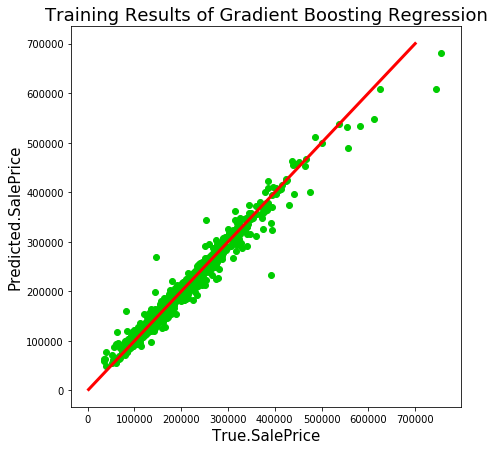

In [22]:
plt.figure(figsize=(7, 7))
plt.plot(line_11_x, line_11_y, lw=3, c = 'r')
plt.scatter(np.exp(y_train), np.exp(model_GBoost.predict(X_train)), c='#00CC00')
plt.xlabel('True.SalePrice', fontsize=15)
plt.ylabel('Predicted.SalePrice', fontsize=15)
plt.title('Training Results of Gradient Boosting Regression', fontsize=18)
plt.show()

In [23]:
y_test = np.exp(model_GBoost.predict(X_test.values))
type(y_test), y_test.shape

(numpy.ndarray, (1459,))

In [24]:
submit = pd.DataFrame(columns = ['SalePrice'])
submit['Id'] = test_ID['Id']
submit['SalePrice'] = y_test
submit.head()

,SalePrice,Id
0,123370.477980,1461
1,153617.612594,1462
2,185320.352274,1463
3,194716.657480,1464
4,187713.229513,1465


In [25]:
submit.to_csv('./data/submission_03_GBoost.csv', index=False)

In [153]:
1110/4406 # 0.12323 > 0.11717

0.2519291874716296

### 2. Random Forest Regression

In [30]:
# Round 1
# Round 2
# ......
# Round n-1
grid_param = {'n_estimators': [850, 900, 950, 1000, 1050, 1100], \
              'max_depth': [11, 12, 13, 14, 15, 16], \
              'max_features': ['auto'], \
              'min_samples_split': [2], \
              'min_samples_leaf': [1]}
rfr_search = GridSearchCV(estimator = RandomForestRegressor(n_jobs=-1, oob_score=True), \
                          param_grid=grid_param, cv=n_folds)
rfr_search = rfr_search.fit(X_train, y_train)

In [31]:
print('Training accuracy:',rfr_search.score(X_train, y_train))
rfr_search.best_score_, rfr_search.best_params_

Training accuracy: 0.984289051453572


(0.8842228810138573,
 {'max_depth': 13,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 1000})

In [32]:
# Round n
grid_param = {'n_estimators': [1000], \
              'max_depth': [14], \
              'max_features': ['auto'], \
              'min_samples_split': [2, 4, 6], \
              'min_samples_leaf': [1, 3, 5]}
rfr_search = GridSearchCV(estimator = RandomForestRegressor(n_jobs=-1, oob_score=True), \
                          param_grid=grid_param, cv=n_folds)
rfr_search = rfr_search.fit(X_train, y_train)

In [33]:
print('Training accuracy:',rfr_search.score(X_train, y_train))
rfr_search.best_score_, rfr_search.best_params_

Training accuracy: 0.9846348897809087


(0.8835563265328555,
 {'max_depth': 14,
  'max_features': 'auto',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 1000})

In [27]:
model_rfr = RandomForestRegressor(n_estimators = 1000, max_depth = 14, max_features = 'auto', \
                                  min_samples_leaf = 1, min_samples_split = 2)

In [28]:
model_rfr.fit(X_train, y_train)
y_pred = model_rfr.predict(X_train)
np.corrcoef(np.array(y_train).flatten(), y_pred)

array([[1.        , 0.99321949],
       [0.99321949, 1.        ]])

In [29]:
y_pred.shape, np.array(y_train).flatten().shape, X_train.shape

((1458,), (1458,), (1458, 79))

In [30]:
score = rmsle_cv(model_rfr)
print('RFR score: {} ({})'.format(score.mean(), score.std()))

RFR score: 0.13581447484882625 (0.005778879177994541)


In [31]:
data = pd.Series({'Model': 'RFR', 'RMSLE.mean': score.mean(), 'RMSLE.std': score.std()})
model_score_df = model_score_df.append(data, ignore_index = True)
model_score_df

,Model,RMSLE.mean,RMSLE.std
0,GBoost,0.114133,0.006360
1,RFR,0.135814,0.005779


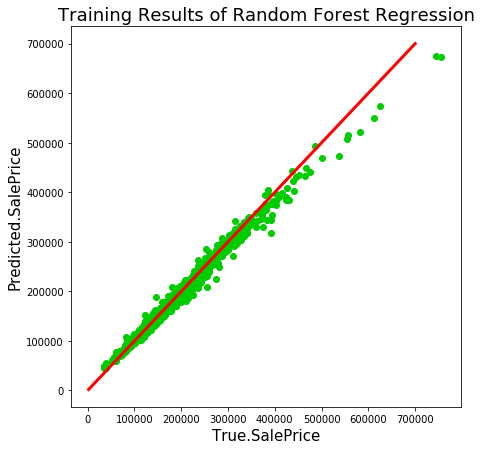

In [32]:
plt.figure(figsize=(7, 7))
plt.plot(line_11_x, line_11_y, lw=3, c = 'r')
plt.scatter(np.exp(y_train), np.exp(model_rfr.predict(X_train)), c='#00CC00')
plt.xlabel('True.SalePrice', fontsize=15)
plt.ylabel('Predicted.SalePrice', fontsize=15)
plt.title('Training Results of Random Forest Regression', fontsize=18)
plt.show()

In [33]:
y_test = np.exp(model_rfr.predict(X_test.values))
type(y_test), y_test.shape

(numpy.ndarray, (1459,))

In [34]:
submit = pd.DataFrame(columns = ['SalePrice'])
submit['Id'] = test_ID['Id']
submit['SalePrice'] = y_test
submit.head()

,SalePrice,Id
0,124350.427952,1461
1,155039.906625,1462
2,187805.923313,1463
3,183466.646132,1464
4,195725.522069,1465


In [35]:
submit.to_csv('./data/submission_03_RFR.csv', index=False)

In [36]:
2342/4406 # 0.14574 > 0.11717

0.5315478892419429